# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



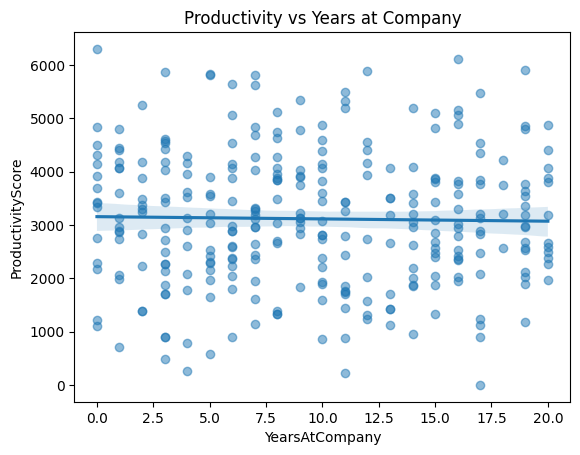

R² (YearsAtCompany): 0.0


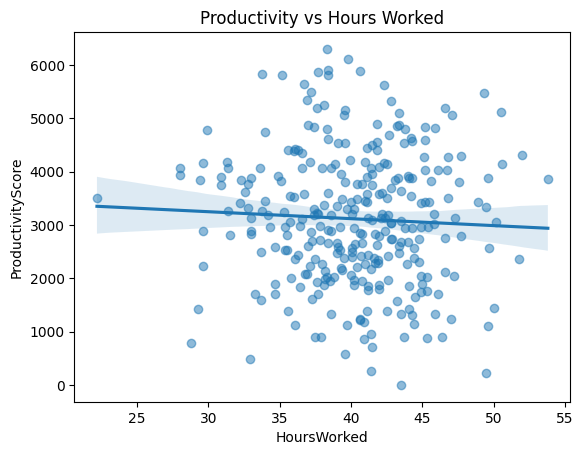

R² (HoursWorked): 0.003


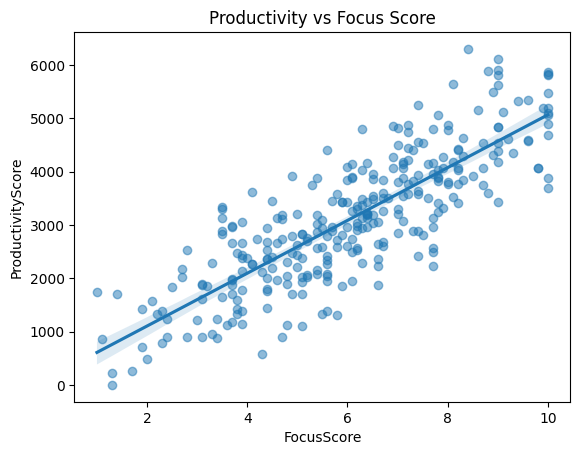

R² (FocusScore): 0.678

Model 1 (Focus only) R²: 0.678
Model 2 (+ HoursWorked) R²: 0.678
Model 3 (+ YearsAtCompany) R²: 0.678
Model 4 (+ TeamMeetingsPerWeek) R²: 0.679


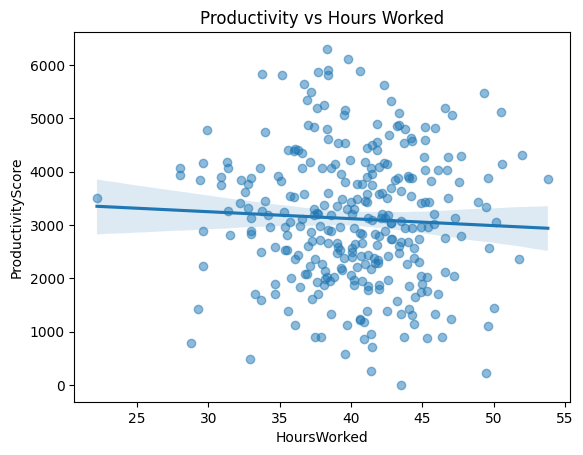

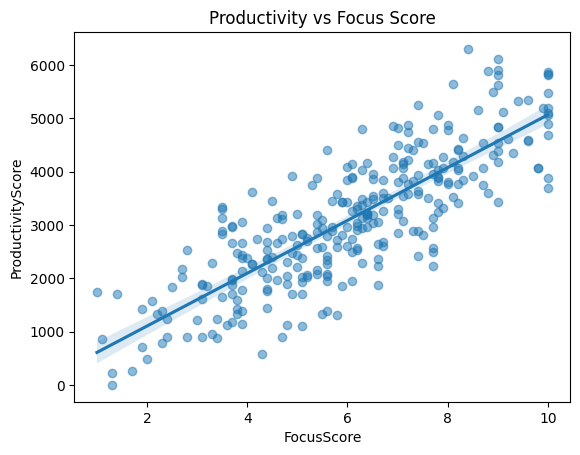

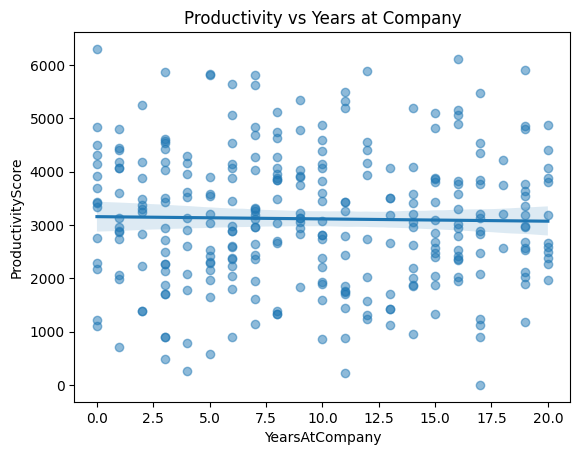

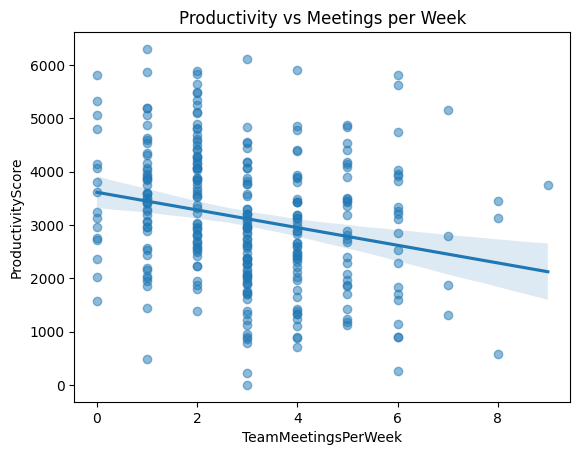


Final model coefficients:
const                  141.900505
FocusScore             500.107325
HoursWorked             -3.592797
YearsAtCompany           2.759602
TeamMeetingsPerWeek     19.753383
dtype: float64


In [10]:
# ============================================
# Employee Productivity Lab (Simplified)
# NOTE: This version uses ONLY quantitative features
# Years at company, hours worked, focus, meetings
# (No department/desklocation modeling)
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# -------------------------
# 0) Load data
# -------------------------
emp_df = pd.read_csv("Employee_productivity.csv")  # update path if needed
emp_df.head()

# -------------------------
# 1) PART 1
# Determine which feature (YearsAtCompany, HoursWorked, FocusScore)
# has the strongest linear relationship with ProductivityScore.
# Show visualization + calculate R^2 for all three.
# -------------------------

# A) Productivity vs YearsAtCompany
sns.regplot(x="YearsAtCompany", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Years at Company")
plt.show()

X = sm.add_constant(emp_df["YearsAtCompany"])
y = emp_df["ProductivityScore"]
model_years = sm.OLS(y, X).fit()
print("R² (YearsAtCompany):", round(model_years.rsquared, 3))

# B) Productivity vs HoursWorked
sns.regplot(x="HoursWorked", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Hours Worked")
plt.show()

X = sm.add_constant(emp_df["HoursWorked"])
y = emp_df["ProductivityScore"]
model_hours = sm.OLS(y, X).fit()
print("R² (HoursWorked):", round(model_hours.rsquared, 3))

# C) Productivity vs FocusScore
sns.regplot(x="FocusScore", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Focus Score")
plt.show()

X = sm.add_constant(emp_df["FocusScore"])
y = emp_df["ProductivityScore"]
model_focus = sm.OLS(y, X).fit()
print("R² (FocusScore):", round(model_focus.rsquared, 3))


# -------------------------
# 2) PART 2
# Build on the linear regression model to determine what other
# features also impact productivity. Evaluate each feature.
#
# We'll build step-by-step and compare R^2:
#   Model 1: Focus only
#   Model 2: Focus + HoursWorked
#   Model 3: Focus + HoursWorked + YearsAtCompany
#   Model 4: Focus + HoursWorked + YearsAtCompany + TeamMeetingsPerWeek
#
# NOTE: If FocusScore is NOT your best predictor, you can swap in
# the best one for Model 1. This is just the clean template.
# -------------------------

# Model 1: Focus only
X1 = sm.add_constant(emp_df[["FocusScore"]])
y = emp_df["ProductivityScore"]
m1 = sm.OLS(y, X1).fit()
print("\nModel 1 (Focus only) R²:", round(m1.rsquared, 3))

# Model 2: add HoursWorked
X2 = sm.add_constant(emp_df[["FocusScore", "HoursWorked"]])
m2 = sm.OLS(y, X2).fit()
print("Model 2 (+ HoursWorked) R²:", round(m2.rsquared, 3))

# Model 3: add YearsAtCompany
X3 = sm.add_constant(emp_df[["FocusScore", "HoursWorked", "YearsAtCompany"]])
m3 = sm.OLS(y, X3).fit()
print("Model 3 (+ YearsAtCompany) R²:", round(m3.rsquared, 3))

# Model 4: add Meetings per week (if column exists)
if "TeamMeetingsPerWeek" in emp_df.columns:
    X4 = sm.add_constant(emp_df[["FocusScore", "HoursWorked", "YearsAtCompany", "TeamMeetingsPerWeek"]])
    m4 = sm.OLS(y, X4).fit()
    print("Model 4 (+ TeamMeetingsPerWeek) R²:", round(m4.rsquared, 3))
    final_model = m4
else:
    print("\nNOTE: Column 'TeamMeetingsPerWeek' not found. Skipping meetings feature.")
    final_model = m3

# Show full summary for the final model
final_model.summary()


# -------------------------
# Visualizations for added features (regplots)
# so you can reference them in the write-up.
# -------------------------

sns.regplot(x="HoursWorked", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Hours Worked")
plt.show()

sns.regplot(x="FocusScore", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Focus Score")
plt.show()

sns.regplot(x="YearsAtCompany", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
plt.title("Productivity vs Years at Company")
plt.show()

if "TeamMeetingsPerWeek" in emp_df.columns:
    sns.regplot(x="TeamMeetingsPerWeek", y="ProductivityScore", data=emp_df, scatter_kws={"alpha": 0.5})
    plt.title("Productivity vs Meetings per Week")
    plt.show()


# -------------------------
# 3) PART 3 (WRITE-UP HELP)
# Print coefficients to interpret direction (+/-)
# Positive coef => increases productivity
# Negative coef => decreases productivity
# -------------------------
print("\nFinal model coefficients:")
print(final_model.params)
